In [10]:
import os
import json
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

In [86]:
path_processed = "/scratch/mepicard/physio_data/emotionvideos/processed"
path_segmented = "/scratch/mepicard/physio_data/emotionvideos"
sub = os.listdir(path_processed)
sub.sort()

In [87]:
ses = []
for s in sub:
    session = os.listdir(os.path.join(path_processed, s))
    session.sort()
    ses.append(session)

# General functions

In [4]:
def load_json(file):
    f = open(file)
    data = json.load(f)
    f.close()
    return data

In [5]:
def load_processed_data(path_data, sub, ses, data_type='ppg'):
    signal, info = [], [] 
    
    files = ['_'.join(f.split('_')[:-1]) for f in os.listdir(os.path.join(path_data, sub, ses)) if data_type in f]
    files = [*set(files)]
    files.sort()
    
    for file in files:
        print('-'*20+f'Loading {file}'+'-'*20)
        try:
            signal.append(pd.read_csv(os.path.join(path_data,sub,ses,f'{file}_signals.tsv'), sep='\t'))
            info.append(load_json(os.path.join(path_data,sub,ses,f'{file}_info.json')))
        except:
            continue
        
    return signal, info

# PPG data

In [6]:
def ppg_quality_indices(infos, ses, sub, sub_id):
    for idx, i in enumerate(infos):
        print('-'*20+f"{ses[sub.index(sub_id)][idx]}"+'-'*20)
        for idx, r in enumerate(i):
            print('-'*21+f'Run {idx+1}'+'-'*21)
            print(f"PPG ectopic: {r['PPG_ectopic']}")
            print(f"PPG short: {r['PPG_short']}")
            print(f"PPG long: {r['PPG_long']}")
            print(f"PPG extra: {r['PPG_extra']}")
            print(f"PPG missed: {r['PPG_missed']}")
            print(f"Mean RR invertal: {np.mean(r['PPG_clean_rr_systole'])}")
            print(f"Std RR invertal: {np.std(r['PPG_clean_rr_systole'])}")
            print(f"PPG cumulseconds rejected: {r['PPG_cumulseconds_rejected']}")
            print(f"PPG % rejected segments: {r['PPG_%_rejected_segments']}")
            print(f"PPG rejected segments: {r['PPG_rejected_segments']}")
        print('-'*47)

In [7]:
def save_ppg_infos_as_csv(info, sub_idx, path_output):
    cols_info = ['PPG_ectopic', 'PPG_short', 'PPG_long', 'PPG_extra', 'PPG_missed', 'PPG_cumulseconds_rejected', 'PPG_%_rejected_segments']
    df_quality = pd.DataFrame(columns = cols_info)
    
    for idx_ses, ses in enumerate(infos):
        rows= []
        for run in ses:
            tmp = {key: run[key] for key in cols_info}
            tmp['Mean_RR_intervals'] = np.mean(run['PPG_clean_rr_systole'])
            tmp['Std_RR_invertals'] = np.std(run['PPG_clean_rr_systole'])
            rows.append(tmp)
            
        df_quality = pd.DataFrame(rows)
        df_quality.to_csv(os.path.join(path_output, sub_idx, f"ses-00{idx_ses+1}", f"infos_quality_ppg.csv"))

In [80]:
def plot_rr_invertals(infos_sub, sub_idx=None, save=False, path_output=None):
    for idx_ses, ses in enumerate(infos_sub):
        rr, runs = [], []
        if len(ses) == 1:
            figsize=(2,4)
        else:
            figsize=(8,4)

        for idx, run in enumerate(ses):
            rr.append(run['PPG_clean_rr_systole'])
            runs.append([f'run-0{idx+1}']*len(run['PPG_clean_rr_systole']))

        rr = [j for i in rr for j in i]
        runs = [j for i in runs for j in i]
        try:
            plt.figure(figsize=figsize)
            pt.half_violinplot(x='run', y='RR', data=pd.DataFrame({'run': runs, 'RR': rr}), palette="rainbow", 
                               bw=.2, cut=0., scale="area", width=0.6, inner=None)
            sns.stripplot(x='run', y='RR', data=pd.DataFrame({'run': runs, 'RR': rr}), edgecolor="white", 
                          palette="rainbow", alpha=0.3, size=3, s=7, jitter=1, zorder=0)
            sns.boxplot(x='run', y='RR', data=pd.DataFrame({'run': runs, 'RR': rr}), 
                        color="black", width=0.15, zorder=10, showcaps=True, showfliers=False,
                        boxprops={'facecolor':'none', 'zorder':10}, saturation=1,
                        whiskerprops={'linewidth':2, 'zorder':10})
            plt.xlabel('')
            plt.xticks(fontsize=12)
            plt.ylabel('RR intervals', fontsize=14)
            if save:
                plt.savefig(os.path.join(path_output, sub_idx, f"ses-00{idx_ses+1}", "ppg_rr_intervals_cloud.png"), dpi=300, bbox_inches='tight')
            plt.show()
        except:
            continue

## Sub-02

In [8]:
signals_sub02, infos_sub02 = [], []
for s in ses[sub.index('sub-02')]:
    print('-'*20+f'Loading {s}'+'-'*20)
    signal, info = load_processed_data(path_processed, 'sub-02', s, data_type='ppg')
    signals_sub02.append(signal)
    infos_sub02.append(info)

--------------------Loading ses-001--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_02_ppg--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_03_ppg--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_04_ppg--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_05_ppg--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_06_ppg--------------------
--------------------Loading neuromod_video52023-02-01T10_43_20_07_ppg--------------------
--------------------Loading ses-002--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_video52023-02-08T10_43_56_02_ppg--------------------
--------------------Loading neuromod_video52023-02-08T10_43_56_03_ppg--------------------
--------------------Loading neuromod_video52

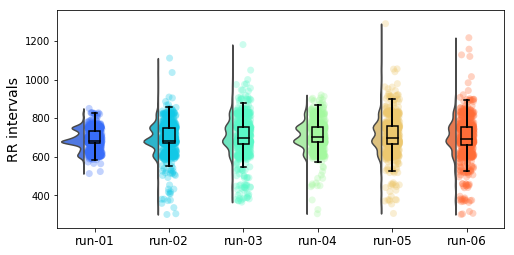

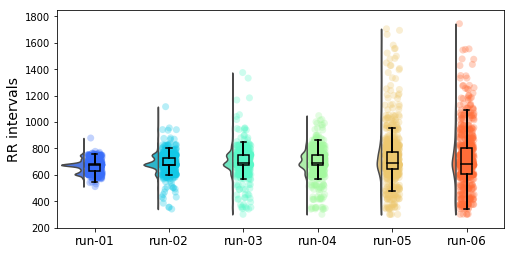

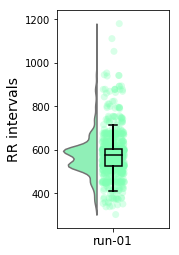

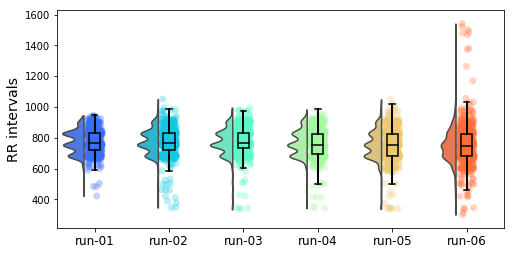

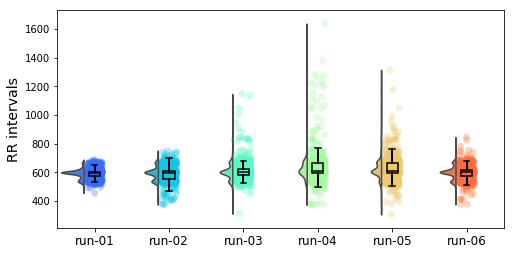

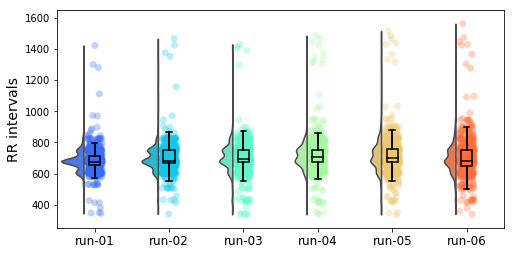

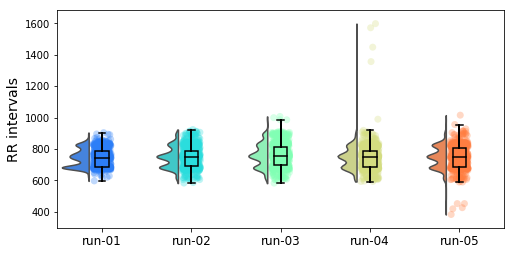

In [75]:
plot_rr_invertals(infos_sub02, sub_idx='sub-02', save=True, path_output=path_processed)

In [53]:
save_ppg_infos_as_csv(infos, sub_idx='sub-02', path_output=path_processed)

In [42]:
ppg_quality_indices(infos_sub02, ses, sub, sub_id='sub-02')

--------------------ses-001--------------------
---------------------Run 1---------------------
PPG ectopic: 102
PPG short: 1
PPG long: 2
PPG extra: 5
PPG missed: 2
Mean RR invertal: 691.0484021304926
Std RR invertal: 50.632031522578856
PPG cumulseconds rejected: 112
PPG % rejected segments: 0.21476510067114093
PPG rejected segments: [[3760, 55287], [131902, 160550], [282554, 331070], [399786, 418862], [1307628, 1337248], [1599215, 1627561], [1676368, 1708336], [1740862, 1776502], [1776502, 1814443], [2321632, 2354926], [2669083, 2713990], [2713990, 2743345], [2743345, 2785576], [2785576, 2825875], [2987870, 3037822], [3138192, 3178650], [3214871, 3251320], [3251320, 3287649], [3323499, 3357373], [3380837, 3420106], [3486276, 3530919], [3530919, 3562814], [3562814, 3615010], [3615010, 3662424], [3662424, 3698873], [3698873, 3747532], [3841154, 3876662], [3876662, 3906556], [3934355, 3955402], [3955402, 3987394], [4039057, 4066894], [4135579, 4170262], [4170262, 4211415], [4252381, 4288

## Sub-03

In [88]:
signals_sub03, infos_sub03 = [], []
for s in ses[sub.index('sub-03')]:
    print('-'*20+f'Loading {s}'+'-'*20)
    signal, info = load_processed_data(path_processed, 'sub-03', s, data_type='ppg')
    signals_sub03.append(signal)
    infos_sub03.append(info)

--------------------Loading ses-001--------------------
--------------------Loading infos_quality--------------------
--------------------Loading ses-002--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_02_ppg--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_03_ppg--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_04_ppg--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_05_ppg--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_06_ppg--------------------
--------------------Loading neuromod_video52023-01-24T14_11_56_07_ppg--------------------
--------------------Loading ppg_rr_intervals--------------------
--------------------Loading ses-003--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_vide

<Figure size 576x288 with 0 Axes>

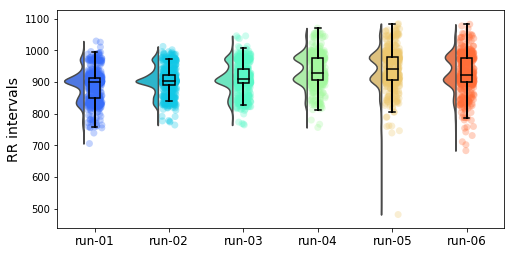

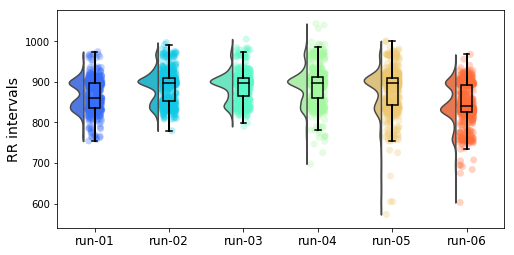

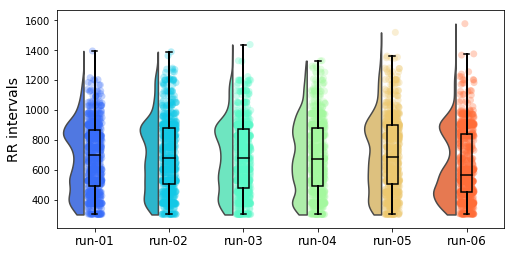

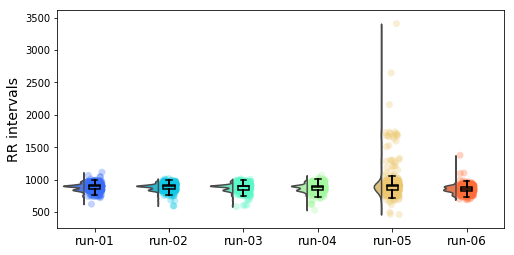

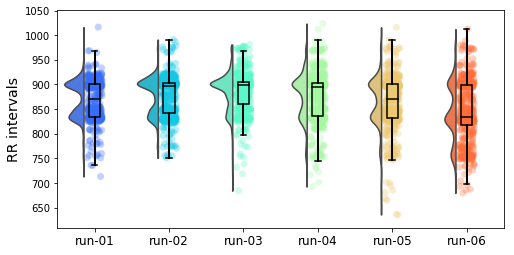

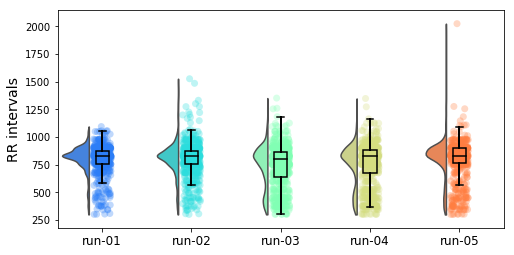

In [89]:
plot_rr_invertals(infos_sub03, sub_idx='sub-03', save=True, path_output=path_processed)

In [55]:
save_ppg_infos_as_csv(infos, sub='sub-03', path_output=path_processed)

In [22]:
ppg_quality_indices(infos, sub, sub_id='sub-03')

--------------------ses-001--------------------
-----------------------------------------------
--------------------ses-002--------------------
---------------------Run 1---------------------
PPG ectopic: 17
PPG short: 1
PPG long: 0
PPG extra: 5
PPG missed: 0
Mean RR invertal: 888.4092307692307
Std RR invertal: 49.34534209857287
PPG cumulseconds rejected: 13
PPG % rejected segments: 0.024928092042186004
---------------------Run 2---------------------
PPG ectopic: 38
PPG short: 2
PPG long: 2
PPG extra: 7
PPG missed: 0
Mean RR invertal: 904.5706597222222
Std RR invertal: 42.9001753134632
PPG cumulseconds rejected: 17
PPG % rejected segments: 0.032598274209012464
---------------------Run 3---------------------
PPG ectopic: 38
PPG short: 2
PPG long: 1
PPG extra: 7
PPG missed: 1
Mean RR invertal: 911.7243881118881
Std RR invertal: 47.38698083355724
PPG cumulseconds rejected: 7
PPG % rejected segments: 0.013422818791946308
---------------------Run 4---------------------
PPG ectopic: 31
PPG s

## Sub-05 

In [84]:
signals_sub05, infos_sub05 = [], []
for s in ses[sub.index('sub-05')]:
    print('-'*20+f'Loading {s}'+'-'*20)
    signal, info = load_processed_data(path_processed, 'sub-05', s, data_type='ppg')
    signals_sub05.append(signal)
    infos_sub05.append(info)

--------------------Loading ses-001--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_02_ppg--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_03_ppg--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_04_ppg--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_05_ppg--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_06_ppg--------------------
--------------------Loading neuromod_video52023-01-30T17_16_59_07_ppg--------------------
--------------------Loading ses-002--------------------
--------------------Loading infos_quality--------------------
--------------------Loading neuromod_video52023-02-06T17_08_03_02_ppg--------------------
--------------------Loading neuromod_video52023-02-06T17_08_03_03_ppg--------------------
--------------------Loading neuromod_video52

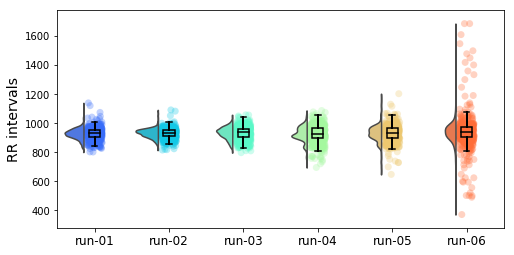

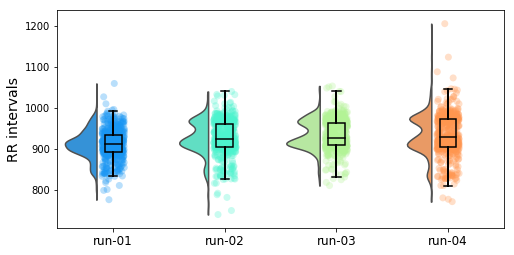

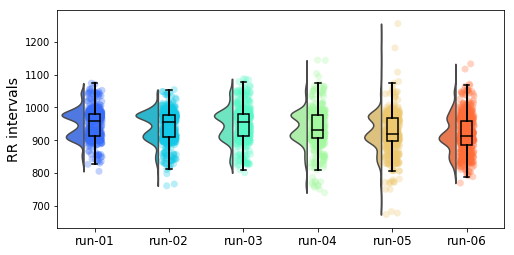

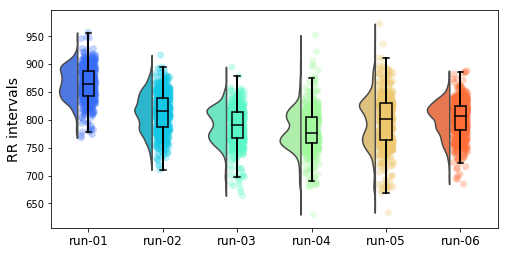

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [85]:
plot_rr_invertals(infos_sub05, sub_idx='sub-05', save=True, path_output=path_processed)

In [57]:
save_ppg_infos_as_csv(infos, sub='sub-05', path_output=path_processed)

In [19]:
ppg_quality_indices(infos, sub, sub_id='sub-05')

--------------------ses-001--------------------
---------------------Run 1---------------------
PPG ectopic: 24
PPG short: 1
PPG long: 5
PPG extra: 0
PPG missed: 0
Mean RR invertal: 928.5038392857143
Std RR invertal: 38.840241170958485
PPG cumulseconds rejected: 0
PPG % rejected segments: 0.0
---------------------Run 2---------------------
PPG ectopic: 4
PPG short: 5
PPG long: 2
PPG extra: 0
PPG missed: 0
Mean RR invertal: 931.3922182468694
Std RR invertal: 32.46711325666178
PPG cumulseconds rejected: 0
PPG % rejected segments: 0.0
---------------------Run 3---------------------
PPG ectopic: 18
PPG short: 0
PPG long: 7
PPG extra: 0
PPG missed: 1
Mean RR invertal: 933.6919064748201
Std RR invertal: 42.89673571490551
PPG cumulseconds rejected: 0
PPG % rejected segments: 0.0
---------------------Run 4---------------------
PPG ectopic: 25
PPG short: 8
PPG long: 4
PPG extra: 1
PPG missed: 4
Mean RR invertal: 926.0287744227353
Std RR invertal: 56.01279105860278
PPG cumulseconds rejected: 42


# ECG data